Cross validation and bootstrap.

Training error vs test error
Training error is the error we get from applying the model to the data we used to build the model.
Test error is the error we get from applying the model to data that has not been used to build the model.

CP statistic AIC, BIC, use to estimate test error from training error.

Cross-validation, hold out some part of data from training set to use as test data.  Measured by MSE (mean squared error) for quantitative responses and misclassification error rate for qualitative responses (classifications)

CV is used to pick polynomial of the model, not good at telling us the level of the error, wide range.  Highly variable because we're splitting into 2 parts, throwing away half the data in training.

Generally more observations lead to lower error rate.

5.1.2 LOOCV (Leave One Out Cross Validation)
make multiple training sets, each with one value less in it.  Train and test each successive subset and average the MSE across all the permutations of training/test sets.

Advantage is less bias in the result, and no randomness.  Disadvantage is that it can be expensive to implement

5.1.3 k-fold cross validation
Same as LOOCV, but you take $n/k$ observations as test, with the remainder as training.  You take successive subsets and average the MSE across the permutations of training/test sets. LOOCV is basically k-fold with k set to n.  However, one usually uses k=5 or k=10, mostly for computational advantage.

5.1.4 bias-variance trade-off for k-fold CV vs LOOCV

5.1.5 CV on classification problems
Instead of using MSE, calculated avg # of misclassified observations per subset.

5.2 the bootstrap
sampling is performed with replacement

### Lab



In [ ]:
library(ISLR)
attach(Auto)

In [27]:
set.seed(1)
train=sample(392,196)
lm.fit=lm(mpg~horsepower, data=Auto, subset=train)
mean((mpg - predict(lm.fit, Auto))[-train]^2) # MSE

lm.fit2=lm(mpg~poly(horsepower, 2),data=Auto,subset=train) 
# MSE quadratic regression, different from QDA?
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

# MSE for cubic regression
lm.fit3=lm(mpg~poly(horsepower, 3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)



[1] 26.14142

[1] 19.82259

[1] 19.78252

###### 1. 
Using basic statistical properties of the variance, as well as single-variable calculus, derive (5.6). In other words, prove that $α$ given by (5.6) does indeed minimize $Var(αX + (1 − α)Y )$.

(5.6)
$α= \frac{\sigma_Y^2 − σ_{XY}}{σ_X^2 + σ_Y^2 − 2σ_{XY}}$

where $σ_X^2 = Var(X)$, $σ_Y^2 = Var(Y)$, and $σ_{XY} = Cov(X, Y)$.

$\sigma^2 = Var(X)$

$Var(aX+bY) = a^2Var(X) + b^2Var(Y) + 2abCov(XY)$

### 2. 
We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

#### (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

**A**

$1 - (\frac{1}{n})$ 

Because we sample with replacement, each sample is independent from the others.

#### (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

$1 - (\frac{1}{n})$

Same as A because we sample with replacement


#### (c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − 1/n)^n$.

$(1 - (1/n))(1-1/n)..n times = (1-1/n)^n$

#### (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

In [22]:
1 - (1-1/5)^5

[1] 0.67232

#### (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

In [23]:
1 - (1 - 1/100)^100

[1] 0.6339677

#### (f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

In [25]:
1 - (1 - 1/10000)^10000

[1] 0.632139

#### (g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

#### (h) We will now investigate numerically the probability that a boot- strap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

    > store=rep(NA, 10000) 
    > for(i in 1:10000){
        store[i]=sum(sample(1:100, rep=TRUE)==4)>0 }
    > mean(store)
    
Comment on the results obtained.

### 3. We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.

### 4. 
Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction.

### 5. 
In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

#### (a) Fit a logistic regression model that uses income and balance to predict default.

#### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:
1. Split the sample set into a training set and a validation set.
2. Fit a multiple logistic regression model using only the training observations.
3. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
4. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [9]:
require(ISLR)
Default$default_bin = ifelse(Default$default == "No", 0, 1)

set.seed(1)
train = sample(10000,5000)

lm.fit = glm(default_bin~income+balance, data=Default, family="binomial", subset=train)
lm.probs=predict(lm.fit, Default)[-train]
lm.pred=ifelse(lm.probs>=0.5, "1", "0")

cm = as.matrix(table(lm.pred, Default$default_bin[-train]))
n = sum(cm)
diag = diag(cm)
sum(diag) / n

[1] 0.9716

#### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [14]:
k <- 3
errors <- rep(0, k)

for(i in 1:k) {
    train = sample(10000,5000)
    
    glm.fit.train <- glm(default ~ income + balance, family='binomial', data=Default, subset=train)
    y_hat_val <- ifelse(predict(glm.fit.train, Default[-train, ], type='response') >= 0.5, 'Yes', 'No')
    errors[i] <- 1 - mean(y_hat_val == Default[-train, 'default'])
}
print(errors)

[1] 0.0264 0.0262 0.0276


#### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [16]:
Default$student_dummy = ifelse(Default$student == "No", 0, 1)

set.seed(314)
train = sample(10000,5000)

lm.fit = lm(default_bin~student_dummy+income+balance, data=Default, subset=train)
lm.probs=predict(lm.fit, Default)[-train]
lm.pred=ifelse(lm.probs>0.5, "1", "0")

cm = as.matrix(table(lm.pred, Default$default_bin[-train]))
n = sum(cm)
diag = diag(cm)
sum(diag) / n
print(table(lm.pred, Default$default_bin[-train]))

# from genova
train_size <- 
train_subset <- sample(n, train_size)
val_subset <- setdiff(1:n, train_subset)
glm.fit.no_student <- glm(default ~ income + balance, family='binomial', data=Default, subset=train_subset)
y_hat_val_no_student <- ifelse(predict(glm.fit.no_student, Default[val_subset, ], type='response') >= 0.5, 'Yes', 'No')
glm.fit.student <- glm(default ~ income + balance + student, family='binomial', data=Default, subset=train_subset)
y_hat_val_student <- ifelse(predict(glm.fit.student, Default[val_subset, ], type='response') >= 0.5, 'Yes', 'No')
print(paste0('No student dummy variable: ', (1 - mean(y_hat_val_no_student == Default[val_subset, 'default']))))
print(paste0('Student dummy variable:    ', (1 - mean(y_hat_val_student == Default[val_subset, 'default']))))
# [1] "No student dummy variable: 0.0268"
# [1] "Student dummy variable:    0.027"


[1] 0.9666

       
lm.pred    0    1
      0 4833  167


ERROR: Error in sample.int(x, size, replace, prob): object 'train_size' not found


### 6. 
We continue to consider the use of a logistic regression model to predict the probability of `default` using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logistic regression co-efficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `glm()` function. Do not forget to set a random seed before beginning your analysis.
#### (a) Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [19]:
require(ISLR)
set.seed(96)
Default$default_bin = ifelse(Default$default == 'Yes', 1, 0)
glm.fit = glm(default_bin~balance+income, family="binomial", data=Default)
coefficients(summary(glm.fit))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.154047e+01,4.347564e-01,-26.544680,2.958355e-155
balance,5.647103e-03,2.273731e-04,24.836280,3.638120e-136
income,2.080898e-05,4.985167e-06,4.174178,2.990638e-05


#### (b) Write a function, `boot.fn()`, that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [93]:
boot.fn = function(data, index) {
    return(coef(glm(default_bin~balance+income ,data=data,subset=index)))    
}

#### (c) Use the `boot()` function together with your `boot.fn()` function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [96]:
require(boot)
set.seed(101)
boot(Default, boot.fn, R=1000)

Loading required package: boot



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -9.223968e-02  1.396610e-04 6.614673e-03
t2*  1.318050e-04 -3.435488e-07 6.562297e-06
t3*  4.604568e-07  1.912098e-09 1.316595e-07

#### (d) Comment on the estimated standard errors obtained using the `glm()` function and using your bootstrap function.

In the glm and bootstrap models, both standard errors were very close.

### 7. 
In Sections 5.3.2 and 5.3.3, we saw that the `cv.glm()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the `glm()` and `predict.glm()` functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

#### (a) Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.

In [20]:
set.seed(200)
Weekly$Direction_bin = ifelse(Weekly$Direction == 'Up', 1, 0)
glm.fit = glm(Direction_bin~Lag1+Lag2, data=Weekly, family="binomial")

#### (b) Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` using all but the first observation.

In [26]:
loo = seq(2, nrow(Weekly))
loocv.fit = glm(Direction_bin~Lag1+Lag2, data=Weekly, subset=loo)
#print(loocv.fit)

#### (c) Use the model from (b) to predict the direction of the first obser- vation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

In [27]:
loocv.probs = predict(loocv.fit, Weekly)[-loo]
print(loocv.probs)
print(Weekly$Direction_bin[-loo])
loocv.pred=ifelse(loocv.probs>0.5, 1, 0)

ifelse(loocv.pred == Weekly$Direction_bin[-loo], 'Yes', 'No')


        1 
0.5708168 
[1] 0


1 
"No"

#### (d) Write a for loop from i=1 to i=n, where n is the number of observations in the data set, that performs each of the following steps:
1. Fit a logistic regression model using all but the ith observation to predict `Direction` using `Lag1` and `Lag2`.
2. Compute the posterior probability of the market moving up for the ith observation.
3. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
4. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [30]:
errors = 0
for(i in 1:nrow(Weekly)) {
    loocv.fit = glm(Direction_bin~Lag1+Lag2, data=Weekly, subset=-i)
    loocv.probs = predict(loocv.fit, Weekly)[i]
    loocv.pred=ifelse(loocv.probs>0.5, 1, 0)
    errors = errors + ifelse(loocv.pred != Weekly$Direction_bin[i], 1, 0)
}
print(errors)
print(errors / nrow(Weekly))


  1 
488 
        1 
0.4481175 


#### (e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [31]:
errors / nrow(Weekly)

1 
0.4481175

### 8.
We will now perform cross-validation on a simulated data set.
#### (a) Generate a simulated data set as follows:
    > set.seed(1)
    > x=rnorm(100)
    > y=x-2*x^2+rnorm(100)
In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

#### (b) Create a scatterplot of X against Y . Comment on what you find.

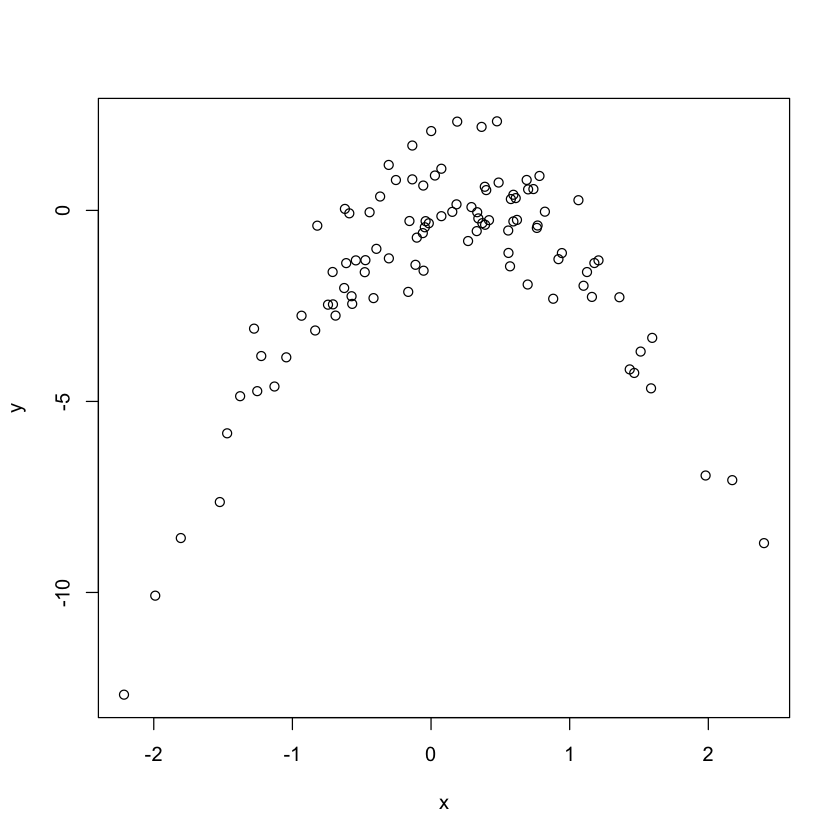

In [152]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm(100)
plot(x, y)

#### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
1. $Y = \beta_0 + \beta_1X + ε$
2. $Y = \beta_0 + \beta_1X + \beta_2X^2 + ε$
3. $Y = \beta_0 +\beta_1X +\beta_2X^2 +\beta_3X^3 +ε$
4. $Y = \beta_0 +\beta_1X +\beta_2X^2 +\beta_3X^3 +\beta_4X^4 +ε$

Note you may find it helpful to use the `data.frame()` function
to create a single data set containing both X and Y .

#### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

#### (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

#### (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

### 9.
We will now consider the Boston housing data set, from the MASS library.
(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate μˆ.

In [34]:
library(MASS)
# a
print('a')
mean(Boston$medv)

# b
print('b')
sd(Boston$medv) / sqrt(nrow(Boston))

# c
print('c')
boot.fn = function(data, index) {
    return(coef(glm(default_bin~balance+income ,data=data,subset=index)))    
}

[1] "a"


[1] 22.53281

[1] "b"


[1] 0.4088611